In [7]:
import jax
import jax.numpy as jnp
import chex

from typing import NamedTuple

from experior.utils import PRNGSequence, moving_average, process_ppo_output
from experior.rl_agents.utils import QNetwork, ActorCritic

# jax.config.update("jax_debug_nans", True)

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
ppo_config = {
  "learning_rate": 2.5e-4,
  "steps": 1e6,
  "train_frequency": 128,
  "num_actors": 7,
  "max_grad_norm": 0.5,
  "epochs_per_iteration": 4,
  "num_minibatches": 4,
  "ent_coef": 0.01,
}


## Environment

In [14]:
from experior.envs import CartPole
env = CartPole()

#from experior.envs import Breakout
#env = Breakout()


## PPO

In [15]:
from experior.rl_agents import make_discrete_ppo_train
actor_critic_network = ActorCritic(action_dim=env.action_space(env.default_params).n,
                                   activation="tanh")

ppo_train = make_discrete_ppo_train(env=env,
                                    actor_critic_network=actor_critic_network,
                                    num_envs=3,
                                    **ppo_config)


In [16]:
jax.config.update("jax_disable_jit", False)
ppo_train = jax.jit(ppo_train)
state, ppo_output = ppo_train(jax.random.PRNGKey(42))


(3, 7)
(3, 7)
(3, 7)


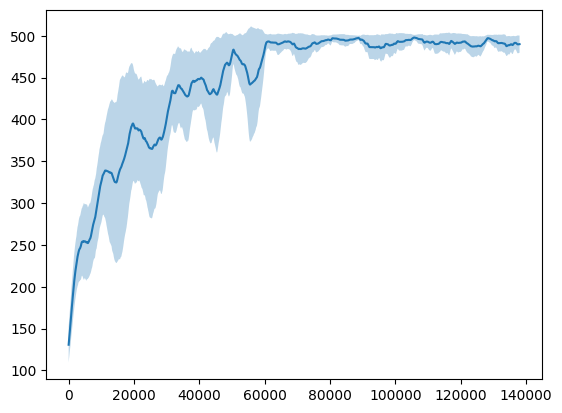

In [17]:
mean, std = process_ppo_output(ppo_output)
plt.plot(mean)
plt.fill_between(jnp.arange(len(mean)), mean - std, mean + std, alpha=0.3)
